In [1]:
import numpy as np
import method.gradient_descent as gd
import method.dichotomy_gradient as dg
import method.wolfe_gradient as wg
import method.func_normalization as fn
import plot.plotter as plotter

In [2]:

def f(x):
    return 1e-3 * x[0] ** 2 + x[1] ** 2

def grad(func):
    h = 1e-5
    return lambda x: (func(x[:, np.newaxis] + h * np.eye(2)) - func(x[:, np.newaxis] - h * np.eye(2))) / (2 * h)

In [3]:
def get_calculations(data, s, func, result):
    data[0].append([s, result[1]])
    data[1].append([s, result[2]])
    data[2].append([s, func(result[0][-1])])

def get_data(start, n, step):
    lr = 0.01
    gradient = [[], [], []]
    dichotomy = [[], [], []]
    wolfe = [[], [], []]
    for s in range(15, n, step):
        func = fn.func_normalization(f, s)
        get_calculations(gradient, s, func, gd.gradient_descent(func, grad(func), start, 1e-2, lr, 1000))
        get_calculations(dichotomy, s, func, dg.dichotomy_gradient(func, grad(func), start, 1e-2, 1e-3, 0.5))
        get_calculations(wolfe, s, func, wg.wolfe_gradient(func, grad(func), start, 1e-2, alpha=0.3, max_iter=1000))
    return gradient, dichotomy, wolfe

In [4]:
def show_plot(gdesc, dich, wolf, start, index, name):
    plotter.plot_by_array([np.asarray(gdesc[index]), np.asarray(dich[index]), np.asarray(wolf[index])], start, "scaling", name).show()

In [5]:
def plots_by_start(start):
    (gdesc, dich, wolf) = get_data(start, 34, 1)
    show_plot(gdesc, dich, wolf, start, 0,  "gradient calculations")
    show_plot(gdesc, dich, wolf, start, 1, "function calculations")
    show_plot(gdesc, dich, wolf, start, 2, "result value")

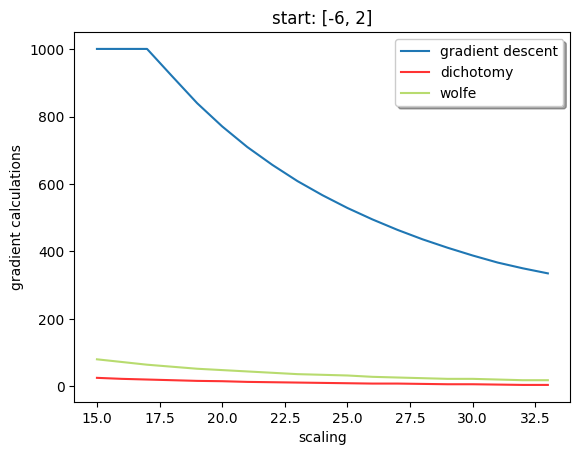

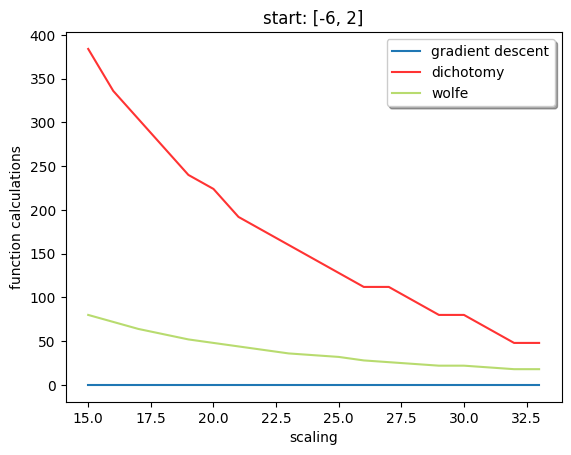

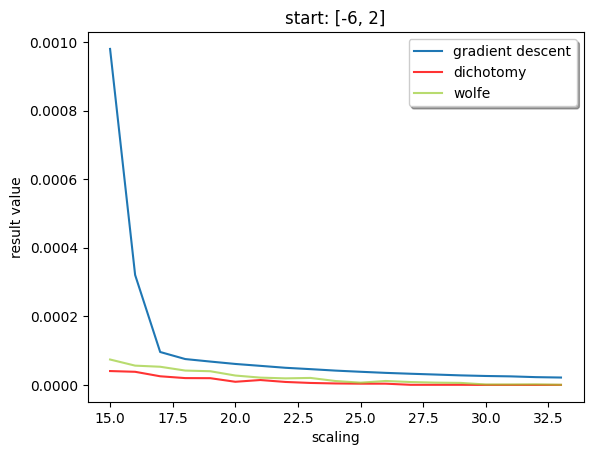

In [6]:
plots_by_start([-6, 2])

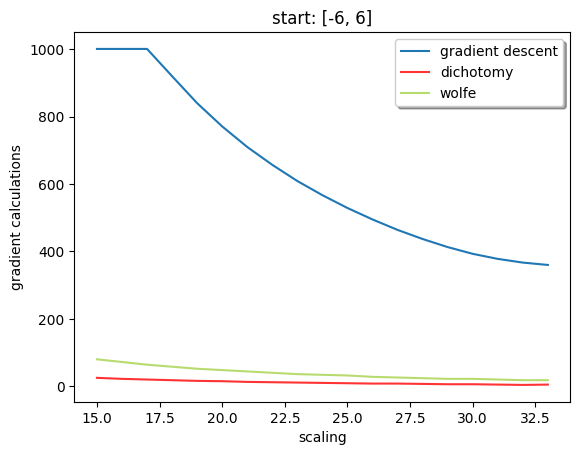

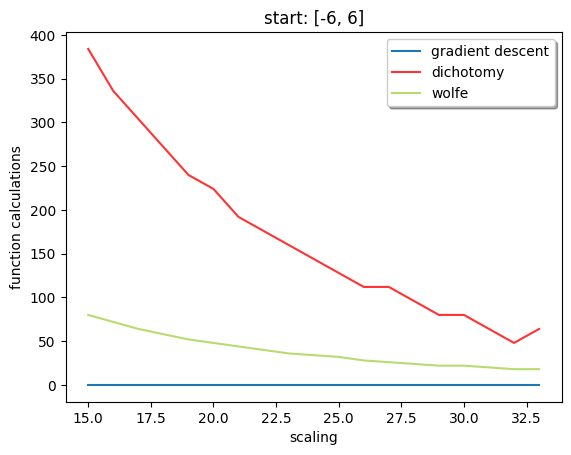

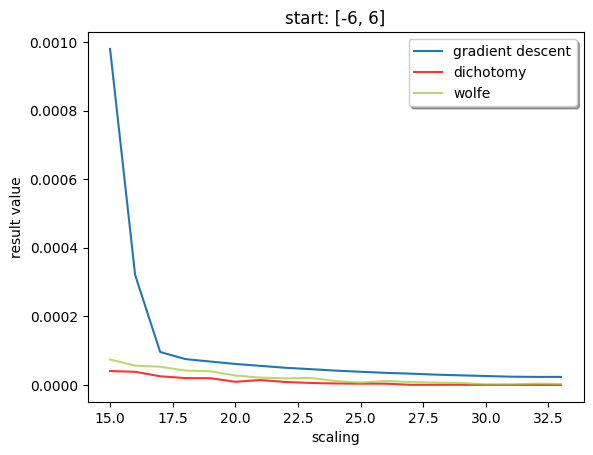

In [7]:
plots_by_start([-6, 6])

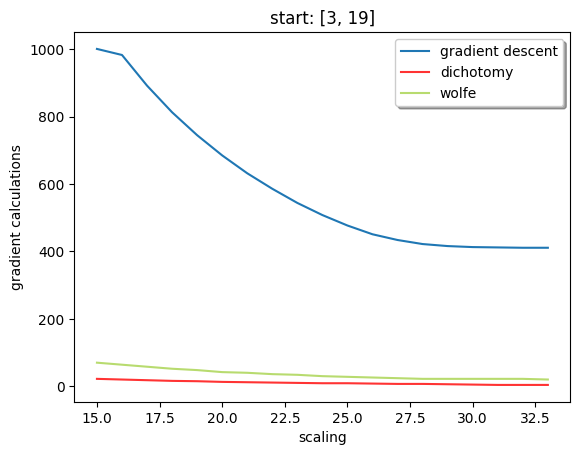

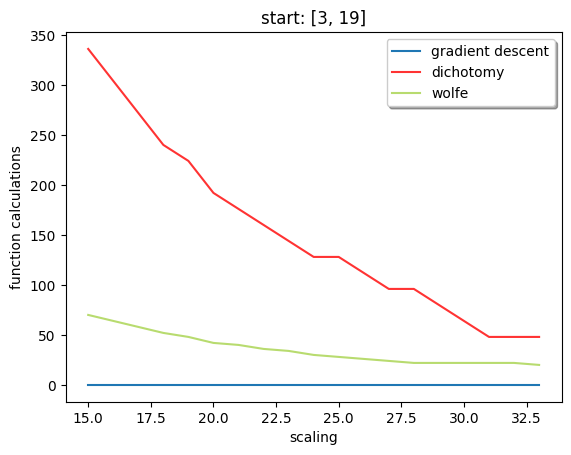

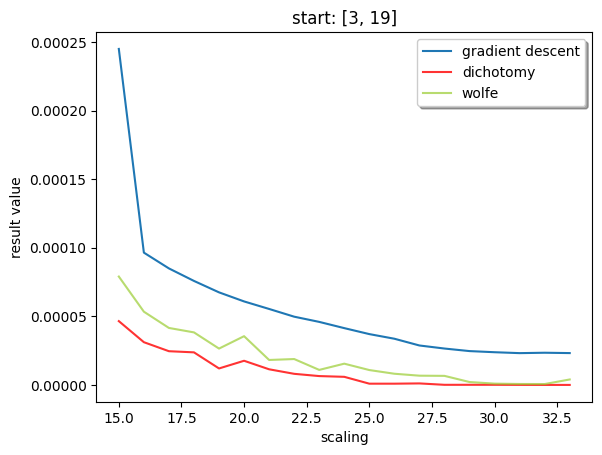

In [8]:
plots_by_start([3, 19])